In [2]:
from Bio import SeqIO, pairwise2
from Bio.SeqUtils import GC, MeltingTemp as mt, molecular_weight as mw, nt_search
from collections import Counter
from matplotlib import pyplot as plt
from Levenshtein import distance

In [7]:
record = SeqIO.read('f.fasta', 'fasta')
seqA = record.seq
print("seq A:", seqA)
print("length:", len(seqA))
print("complement:", seqA.complement())
print("transcribe:", seqA.transcribe())
print("translate:", seqA.translate())

seq A: GTGAGAGAAGCCTGGGACGGGGAGAAAAAAGAATTGAGCTCAAGTTCAAGGGGGAGAAAAAAGAATTGAGCTCAAGTTCAAGGGATCGAGGCCAAGAGCTGATCTCCTTGATGTCCTTGGATCATTAATTCTGAAGAATGTTGATTCCACTAAATTTGCTGTGGATTATAGAATATTAAGCCGCGTGAGTCTTTGCAGAACTTTTCACAGCCTATCCTATGCTAATATGCATTGTGACTGTCCTGTAACGGCATCTGGGTAGAGGGCACAAGGCACTGTCCAACCTTGTTGGACCGCAGGTGCATCTGTGTGGACTGGTGCTTCTTGGGAGTACATTTCGGGAAGCACAGTGGGCTGGGGGTGGGAAGCTGCGCTGGCAGGTTAGCAGTGAGAACCCTGTCTGACTCTCTCATGTCCATTTCTCTCACCAAG
length: 432
complement: CACTCTCTTCGGACCCTGCCCCTCTTTTTTCTTAACTCGAGTTCAAGTTCCCCCTCTTTTTTCTTAACTCGAGTTCAAGTTCCCTAGCTCCGGTTCTCGACTAGAGGAACTACAGGAACCTAGTAATTAAGACTTCTTACAACTAAGGTGATTTAAACGACACCTAATATCTTATAATTCGGCGCACTCAGAAACGTCTTGAAAAGTGTCGGATAGGATACGATTATACGTAACACTGACAGGACATTGCCGTAGACCCATCTCCCGTGTTCCGTGACAGGTTGGAACAACCTGGCGTCCACGTAGACACACCTGACCACGAAGAACCCTCATGTAAAGCCCTTCGTGTCACCCGACCCCCACCCTTCGACGCGACCGTCCAATCGTCACTCTTGGGACAGACTGAGAGAGTACAGGTAAAGAGAGTGGTTC
transcribe: GUGAGAGAAGCCUGGGACGGGGAGAAAAAAGAAUUGAGCUCAAGUUCAAGGGGGAGAAAAAAGAAUUGAGCUCAAGUUCAAGGGAUCGAGG

In [8]:
seqPart = seqA[223:250]
print("seq part from 224 to 250:", seqPart)
print("length:", len(seqPart))

seq part from 224 to 250: AATATGCATTGTGACTGTCCTGTAACG
length: 27


In [9]:
nt_search(str(seqA), 'ATTC')

['ATTC', 127, 143]

In [11]:
temp = [x for x in seqA if x in 'AGCT']
temp = ''.join(temp)
print("GC:", GC(temp))
print("AT:", 100-GC(temp))
print("length:", len(temp))

GC: 48.379629629629626
AT: 51.620370370370374
length: 432


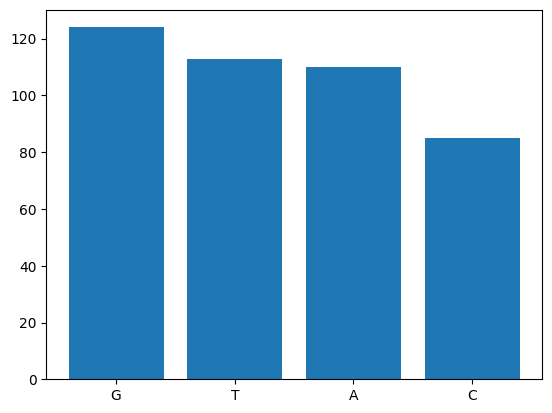

In [12]:
resCounter = Counter(seqA)
plt.bar(resCounter.keys(), resCounter.values())
plt.show()

In [13]:
print("tm_wallace:", mt.Tm_Wallace(seqA))
print("tm_GC:", mt.Tm_GC(seqA))
print("tm_NN:", mt.Tm_NN(seqA))

tm_wallace: 1282.0
tm_GC: 78.10165152467444
tm_NN: 80.909771186088


In [15]:
print("molecular weight:", mw(seqA))

molecular weight: 134246.5464999998


In [16]:
seqB = "AGCTGATCGTACGTAGGACGTAGTCGATATCTACATGAGCGCGGCGCATATATATATGCGATCGTAGCTGACGATCATCATCGTAGCTAGTCGATGCTAGCTGATCGCCCCCGGGGGGGGATATATTATATAGGTATAAAAAATGTGTGTTGGTTTTTTTTTTTTTTTTCAGTCGTAGCTGATCGATGCGATGCTAGTCGTAGCTGATCGATCGTAGCTGATCGTAACGACGTCCAGAGTTTTTTCTTTAGCAAACAGATTTATTACAAACGGTGAAAAATGCAGAGGCAACTTAAAGCCCATTCCAGTAAAAAACATTCAGGCTTTGGAGAATCGGAGAAAGTCCACCTGGATGTCAACCTGAAGAAACATTTGGAAAACTTGGAGTCAGTTTTCAGCTTTTTAAGCCCTTTATTTTTTGCCTCTTATTTGTATGTTTCTTTTCTCAACGAAAAATGTTTTAATTTTAGCACAATCAACGTAAACCTGACGGTCTAATTTCATCTGAGTGATAGCTAGAATTAGTGTGCCATTGGTTGTTTGTTTTCATTTTGTAGATTTACTACATTGAGTGTGCGAATGTGTCATGAATTTCGTTTAAAGTTTGCATATTCCAGTAGCAAATTAAATGTTTATAAAAAATAAGTTTTGTTTTGGATCTGAAGTGCATGATATTGCATATTGTTAATGAACTTACAGACTTCTTCTTGTGGCGTAGCGATCGTAGCTGATGCTGATCGATGCTAGTCGATGCGATCGTAGCTGATGCTAGCTGATCGTAGCTAGCTAGCTAGTCGTGTGCTGTCGTGTGTGATCATCGATGCTAGCGATCGAGCTAGCTGATCGAGCTAGTCGATCGTAGCTAGTCGATGCTAGCTGATCGTAGCTGATCGTATATTTATATATATGCGCTACTAGCTTGACGATCATGCTAGTGTGTGTCGTAGCTGATGCGCGCGCGTATATATATAATTTTTTTTAAAGTCGATGCCCCCCCCGGGGGAGATGTCAGCTGATCGATGCTAGGATATGCTGATCGTAGCTGACGATGCTGATGCTAGGGCGCCCGGGATTATATATTTTTAAAGGCTACGTACGGGCGCGCGGGGCGAGCTGAGGGGCGCGCGGTATATATTATAGCTGTAGCTAGCTGAGCTAGCTGGGGATAAAAAATTTTTTATGCTAGCTGATCGATGCATCGCGAGA"
localAlignmx = pairwise2.align.localmx(seqA, seqB, 2, -1)
print(pairwise2.format_alignment(*localAlignmx[0]))

1 G-TGA--G-A-GA-AGC--C-T-G--G----------GA-CG-GG-G-AG-A-A-A-A----A----AG---A--AT--T----G-AGCTCAAGT---T-C-A----A--G-----GGGGAG---A-A-A--A-A-AG--A-A-----T-TGA-G--------------------C--TC--A----A--G-T----T-C-A-----AG--G---GATCG-AG--G--C----C-A-----AGAG------CT---G-A------T------C------T--------C-----C---TT---G---AT----GT------C---C----TT-GGA---TC--AT-----T--A-----AT-TC----TGAAGAA---TGTTG-A----TT-----C------CA-CT----AA-------ATTT---GC-T-------GT--G--------------GA----T-T---A-T---AG-A-ATATT-AA-G----CC-G-CG-T------------GAGT-----CT----TT-G----C-A--G-------------A------A------CT---TT---T---C-A------CA-G-----C------------C-TAT-CC--TA-----T-----G----------------------------CT-AA-T--ATG------CAT-T-GT----GA-CT----G--T-C--CT-GTAA--CG--GC-ATC-T-G--G--G-TAGA--G--G---G-C-A--C-A----AG--G---C-A-CTG-TC----C-A---A-C----C-T-TG-T-T-G-G----A-C--CGCAG-G-T-GC-ATCTG---T-G-TG---GA-CT-G--G-T-G---CT--TC--T--T-G--G---G-AG-T-A-C--AT-TT----------CG------G---GAA-G--CA--C-AGTG-G-G-C-T-G--G--G-G-G----T-------------------

In [17]:
def hamming(seq1, seq2):
    return len([(x,y) for x,y in zip(seq1, seq2) if x != y])

seqC = "TAGAGGCAATGTTATATGAGAATCCTCCAAATGTCCTCCGACATAAATAGCCGGCTCCACCTGTTTGCCTGCACCTGACGTAGCGCCAACTGTCCTCTACCATGGGGGGGCTGCATATCGCACAGCTGTGCGGGTAGAAACTCACATTCCATGGCGATTAGTCGCCGGTGCAGCACATGGGAGCTAATTCGGCATGTGCCCCCAAGCGGGCAGGATAAGGACGCAAGCAATAATGATTGAATGCATAGGACGATGCACACTCGGATGAAGTCTGTCACCTTGGTGCGTTGTATACTCACTCTTTGCCGTGCCGGCAAAATCGGTAAAGGAAGAAGGGTGGTAGCGTCGTTGGGAGGCTCGAAAGCATAAAGTATAGATGCCCTGTAGCACCGTATGCTAGACAGGTTCTAGAGCCCTACCTGTATGAAACCCTTGAACCGCTATCGAGCACGTGTCAAACCCCACCAGATCGTGGAATCCCGCGAGGCGTCATCTATGTACTGTGCTATATCCCCCTTGGCGACCCAGTGATGCCAGGGGCTTGCGTCAAACCAAGTTGGTAGTATCTATCGACATGATAGAATCCATCGTCTAGGATTACGTAAGCCGCAAGCACTCGATCAGGCGCTAGAGCCATTCACATATATATAAGCTCTCGATCTAAGAAGCGTCATCGATCCCTCTAGGATGCCAAGCTTGTGGTTGATCGACATATACAGCTATAAGTCAACGGGCCTTCCACCCGCGTTTTTCTCGCTAGTGATTGCCACACGAGTATACCAAGAGCAAGCATAAGCGTACCGTACCCCGCAGAACAGTAAAACTCCGGGCTCCGAA"
print("hamming:", hamming(seqA, seqC))

hamming: 333


In [18]:
seqD = "CGTAGCTAGCGACTAGTCGACAGCGATCGATGATATGCATGATGATGTATATAATGTGCAGTCGATGCTGATGCATTCTGGCGTCTGACGCTAGCTAGGCTAGCTAGCAGCTAGCTGATCGATGCGATGCTAGTACTGAGTCGACGATGCTAGCTA"
print("levenshtein distance:", distance(seqA, seqD))

levenshtein distance: 285
